# Analytical solutions for quantum radiation reaction in high-intensity lasers

Original authors of the paper: T G Blackburn

Link to pre-print: https://arxiv.org/abs/2312.03592

Author of this notebook: Óscar Amaro (2023)

Data from preprint retrieved with WebPlotDigitizer

Outline:
- [Figure 1](#Figure1): average electron energy as function of $a_0$ - PW
- [Figure 2](#Figure2): electron energy spread as function of $a_0$ - PW
- [Figure 3](#Figure3): ratio of the final and initial standard deviations - PW
- [Figure 4](#Figure4): electron energy spread as function of electron beam radius $R$ - Gaussian 3D

In [1]:
import QScatter
from QScatter import *
from scipy.special import erf

In [8]:
def f(x):
    #T = 30; tau = 1.85 * (T) / (0.8)
    tau = 69.375
    return exp(-2*log(2)*x**2/tau**2) #* sin(phi)

def Iphi(phi):
    """
    Defined after eq 11
    """
    tau = 69.375
    #return quad(lambda psi: np.abs(f(psi))**2, -np.inf, phi)[0]
    return tau/8 * sqrt(pi/log(2))*(1+erf(2*sqrt(log(2))*phi/tau))

In [9]:
def sigphi(phi):
    """
    eq 14 energy spread as function of laser phase
    """
    res = 1/(1+2/3*Rc*Iphi(phi))**4 * (s0**2 + 55*Rc*chi0/(24*sqrt(3))*quad(np.abs(f(psi))**3, -np.inf, phi)[0])
    return sqrt(res)

In [10]:
def eq11(g0, a0, lbd):
    """
    eq 11 average energy as function of laser phase
    """
    aS = 329719
    chi0 = 2*a0*g0*a0/aS
    Rc = alpha * a0 * chi0
    phi = 150
    Iphiphi = Iphi(phi)
    res = 1/(1+2/3*Rc*Iphiphi) + 55*chi0/(8*sqrt(3)*(1+2/3*Rc*Iphiphi)**2) * quad(lambda psi: Rc*np.abs(f(psi))**3 / (1+2/3*Rc*Iphi(psi)), -phi, +phi)[0]
    return res*g0

In [11]:
def eq15(g0, a0, lbd):
    """
    eq 15 average energy fit
    """
    aS = 329719
    chi0 = 2*a0*g0*a0/aS
    Rc = alpha * a0 * chi0
    phi = 150
    Iphiphi = Iphi(phi)
    res = 1/(1+2/3*Rc*Iphiphi) + 55*chi0/(8*sqrt(3)*(1+2/3*Rc*Iphiphi)**2) * quad(lambda psi: Rc*np.abs(f(psi))**3 / (1+2/3*Rc*Iphi(psi)), -phi, +phi)[0]
    
    Ff = 0.369*RcT/(1+0.171*(RcT)**(3/5)+0.0819*RcT)
    #1/(1+0.355*RcT) * (1+(3.969*chi0*Ff/(1+0.355*RcT))
    
    return res*g0

### Figure 1 <a id=Figure1></a>

In [12]:
### a0 values: 3,5,7,10,15,20,25,30,40,50,70,100,150
fil = open('dataWPD/fig1a/wpd.json')
data = json.load(fil)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
#print(datatmp2[indxs,0])

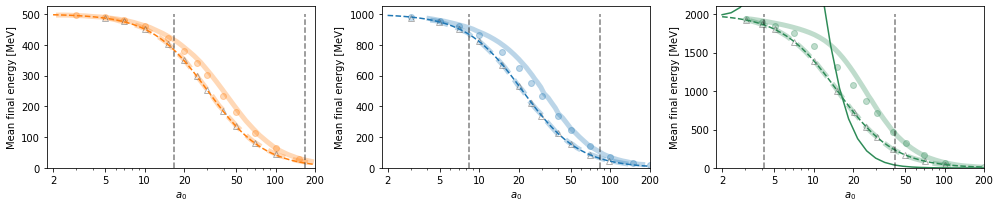

In [13]:
# fluctuations in the data will be due to uncertainty in selecting points in WPD

"""
legend:
- thin line or small markers: this notebook
- thick line or large markers: WPD data from paper
- vertical dashed lines: chi0=0.1 or 1.0
"""

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))
alphaPaper = 0.3
a0lst = np.logspace(np.log10(2),np.log10(200))

### fig 1a
fil = open('dataWPD/fig1a/wpd.json')
data = json.load(fil)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='tab:orange', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
# CRR DiPiazza2008, Vranic2014PRL
axes[0].plot(a0lst, get_PW_gF(500/0.511, a0lst, 0.8, sqrt(2)*30e-15)*0.511, '--', color='tab:orange')

### fig 1b
fil = open('dataWPD/fig1b/wpd.json')
data = json.load(fil)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='tab:blue', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
# CRR DiPiazza2008, Vranic2014PRL
axes[1].plot(a0lst, get_PW_gF(1000/0.511, a0lst, 0.8, sqrt(2)*30e-15)*0.511, '--', color='tab:blue')

### fig 1c
fil = open('dataWPD/fig1c/wpd.json')
data = json.load(fil)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='seagreen', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='seagreen', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='seagreen', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
# CRR DiPiazza2008, Vranic2014PRL
axes[2].plot(a0lst, get_PW_gF(2000/0.511, a0lst, 0.8, sqrt(2)*30e-15)*0.511, '--', color='seagreen')
#
a0lst2 = np.logspace(np.log10(np.min(a0lst)), np.log10(np.max(a0lst)), 30)
y = np.array([eq11(2000/0.511, a0, 0.8)*0.511 for a0 in a0lst2])
axes[2].plot(a0lst2, y, '-', color='seagreen')

def a0vert(E0,chi): return chi/(2*E0/0.511/329719) # 0.8µm laser
x = np.linspace(0,1)
E0lst=np.array([500,1000,2000])

#plt.legend(loc='upper left')
for i in range(3):
    axes[i].plot(x*0+a0vert(E0lst[i],0.1),x*E0lst[i], 'k--',alpha=0.5)
    axes[i].plot(x*0+a0vert(E0lst[i],1),x*E0lst[i], 'k--',alpha=0.5)
    #axes[i].grid()
    #axes[i].set_title('Fig1')
    axes[i].set_xscale('log')
    axes[i].set_xlabel(r'$a_0$')
    axes[i].set_ylabel(r'Mean final energy [MeV]')
    axes[i].set_xlim([1.8,201])
    axes[i].set_xticks([2,5,10,20,50,100,200])
    axes[i].set_ylim([0, 1.05*E0lst[i]])
    axes[i].get_xaxis().set_major_formatter(mticker.ScalarFormatter())
plt.tight_layout()
#plt.savefig('fig1.pdf', transparent=True)
plt.show()

### Figure 2 <a id=Figure2></a>

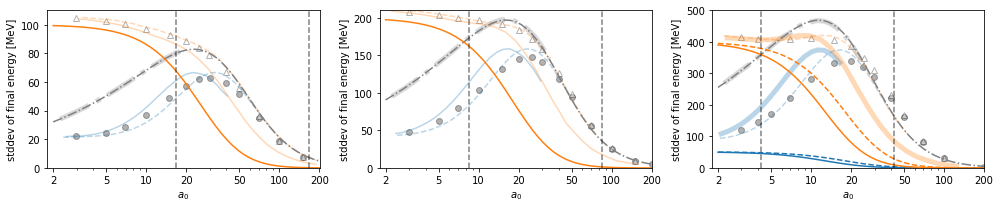

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))
alphaPaper = 0.3
a0lst = np.logspace(np.log10(2),np.log10(200))

### fig 1a
fil = open('dataWPD/fig2a/wpd.json')
data = json.load(fil)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-.', color='grey', label='0', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'ko', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)
# 
axes[0].plot(a0lst, get_PW_sigF(500/0.511,a0lst,0.8, 30)*0.511, '-.', color='grey')
axes[0].plot(a0lst, get_PW_sigF_CRR(500/0.511, a0lst, 0.8, 30e-15, 2*50/0.511)*0.511, '-', color='tab:orange')

### fig 1b
fil = open('dataWPD/fig2b/wpd.json')
data = json.load(fil)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-.', color='grey', label='0', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'ko', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)
#
axes[1].plot(a0lst, get_PW_sigF(1000/0.511,a0lst,0.8, 30)*0.511, '-.', color='grey')
axes[1].plot(a0lst, get_PW_sigF_CRR(1000/0.511, a0lst, 0.8, 30e-15, 2*100/0.511)*0.511, '-', color='tab:orange')

### fig 1c
fil = open('dataWPD/fig2c/wpd.json')
data = json.load(fil)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-.', color='grey', label='0', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'ko', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper, linewidth=5)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)
# 
g0 = 2000; lbd=0.8; tau=30e-15;
axes[2].plot(a0lst, get_PW_sigF(g0/0.511,a0lst, lbd, 30)*0.511, '-.', color='grey')
axes[2].plot(a0lst, get_PW_sigF_CRR(g0/0.511, a0lst, lbd, tau, 100)*0.511, '-', color='tab:blue')
axes[2].plot(a0lst, get_PW_sigF_CRR(g0/0.511, a0lst/sqrt(2), lbd, tau, 100)*0.511, '--', color='tab:blue')
axes[2].plot(a0lst, get_PW_sigF_CRR(g0/0.511, a0lst, lbd, tau, 400/0.511)*0.511, '-', color='tab:orange')
axes[2].plot(a0lst, get_PW_sigF_CRR(g0/0.511, a0lst/sqrt(2), lbd, tau, 400/0.511)*0.511, '--', color='tab:orange')

def a0vert(E0,chi): return chi/(2*E0/0.511/329719) # 0.8µm laser
x = np.linspace(0,1)
E0lst=np.array([500,1000,2000])
maxY=np.array([110,210,500])
for i in range(3):
    axes[i].plot(x*0+a0vert(E0lst[i],0.1),x*maxY[i], 'k--',alpha=0.5)
    axes[i].plot(x*0+a0vert(E0lst[i],1),x*maxY[i], 'k--',alpha=0.5)
    #axes[i].grid()
    #axes[i].set_title('Fig1')
    axes[i].set_xscale('log')
    axes[i].set_xlabel(r'$a_0$')
    axes[i].set_ylabel(r'stddev of final energy [MeV]')
    axes[i].set_xlim([1.8,201])
    axes[i].set_xticks([2,5,10,20,50,100,200])
    axes[i].set_ylim([0,maxY[i]])
    axes[i].get_xaxis().set_major_formatter(mticker.ScalarFormatter())
plt.tight_layout()
#plt.savefig('fig2.pdf', transparent=True)
plt.show()

### Figure 3 <a id=Figure3></a>

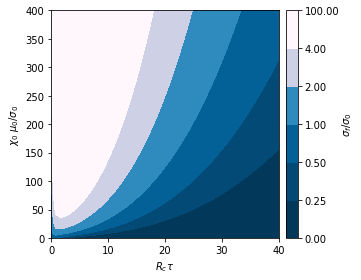

In [15]:
xdim = 50; s0 = 1
x = np.linspace(0,40,xdim)
y = np.linspace(0,400,xdim)
RcT, X0 = np.meshgrid(x,y)
Z = (s0**2 + 0.173*X0*RcT)/(1 + 0.178*RcT)**4

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
cplevels = [1e-3,0.25,0.5,1,2,4,1e2]
strs = ['','0.25','0.5','1','2','4','']
cp = axes.contourf(RcT, X0, Z, levels=cplevels, vmax=4, vmin=0.1, cmap=cm.PuBu_r) # colors='white',, linewidths=1.0
cbar0 = fig.colorbar(cp, ax=axes,fraction=0.1, pad=0.02)
cbar0.set_ticks(cplevels)
cbar0.set_label(r'$\sigma_f/\sigma_0$',labelpad=1,y=0.5)

# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=1/axesratio)
axes.set_xlabel(r'$R_c \tau$')
axes.set_ylabel(r'$\chi_0~\mu_0/\sigma_0$')
# final
plt.tight_layout()
#plt.savefig('fig3.pdf')
plt.show()

### Figure 4 <a id=Figure4></a>

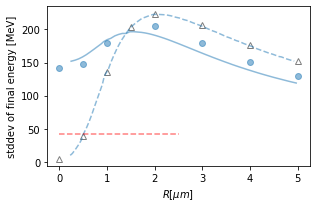

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4.5,3))
alphaPaper = 0.5

### fig 1a
fil = open('dataWPD/fig4/wpd.json')
data = json.load(fil)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=6, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
x = np.linspace(0,1)
E0lst=np.array([500,1000,2000])
maxY=np.array([110,210,500])
plt.plot(x*2.5, x*0+42.5, 'r--', alpha=alphaPaper)
plt.xlabel(r'$R[\mu m]$')
plt.ylabel(r'stddev of final energy [MeV]')
plt.tight_layout()
#plt.savefig('fig4.pdf', transparent=True)
plt.show()